In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


# Multiple Linear Regression

<hr>

## Importing packages and reading the data ##

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

customers = pd.read_csv("../datasets/MLR_ecommerce_customers.csv")

## Explore the data

In [3]:
customers.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<hr>

**Linear** Regression is best suited for working with **numerical data**, so we will cut down our data to just the numerical fields:
- Avg. Session Length
- Time on App
- Time on Website
- Length of Membership
- Yearly Amount Spent


In [5]:
customers = customers[['Avg. Session Length',
                       'Time on App',
                       'Time on Website',
                       'Length of Membership',
                       'Yearly Amount Spent']]

In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
customers.shape

(500, 5)

## Correlation ##
For our linear regression we need to look at the strength of the relationships between variables.

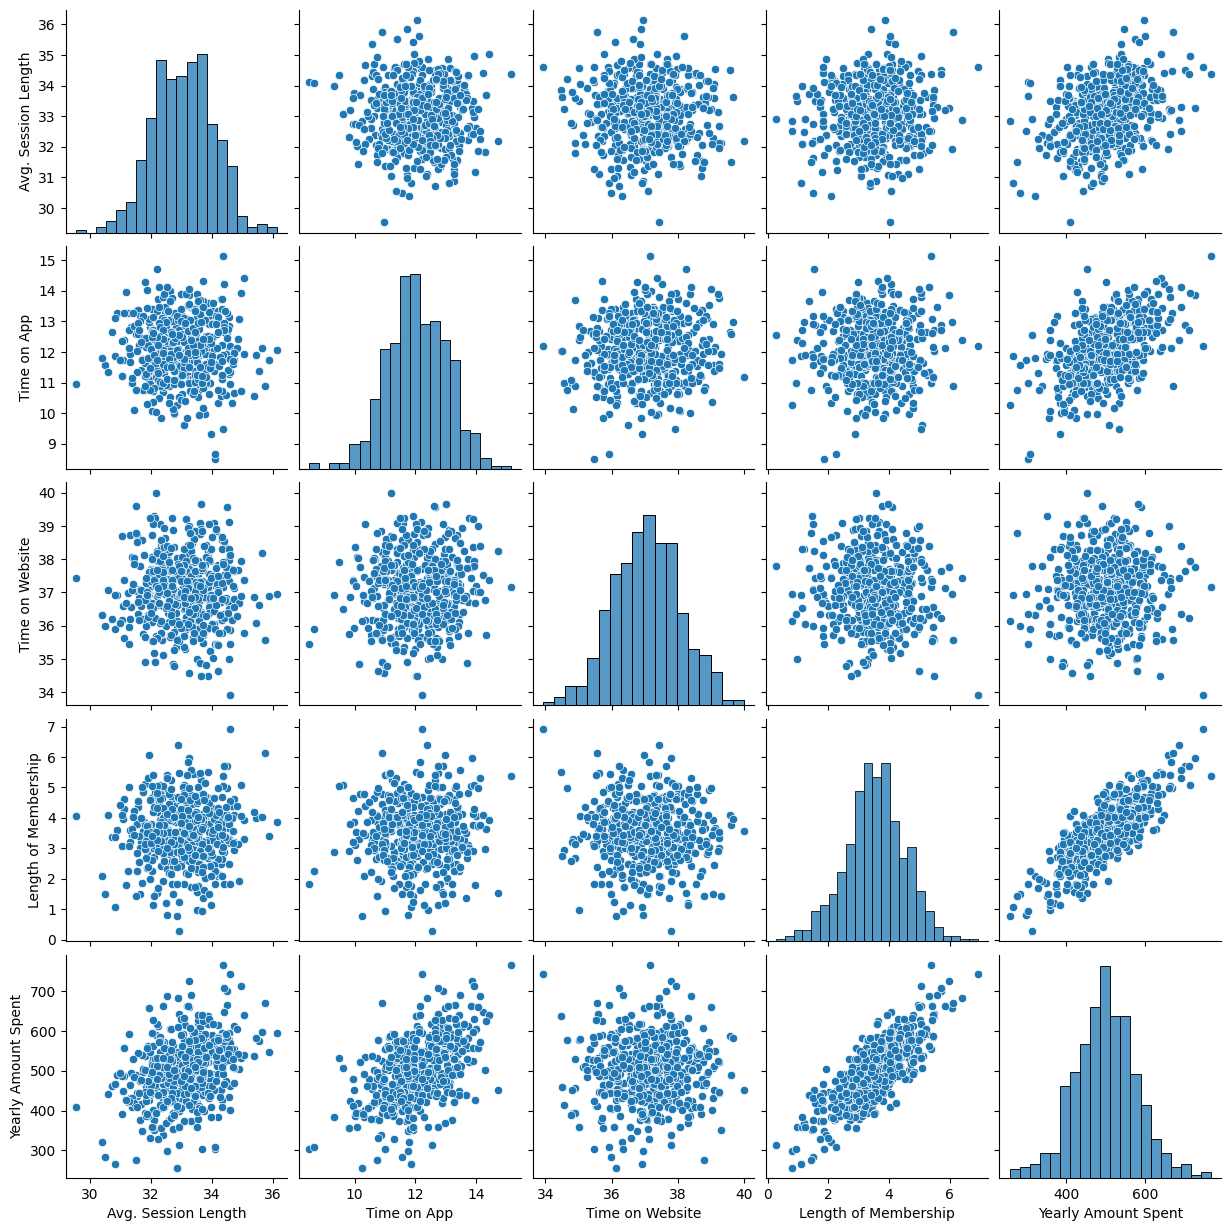

In [8]:
sns.pairplot(customers)


In [9]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Sometimes a correlation matrix with several variables can be hard to read. In this case it helps, if we **filter** our data as we only want to look at the stronger correlationships.

In [10]:
# filter the correlation matrix to show only (absolute) values above 0.4
corr_matrix = customers.corr().abs()
filtered_matrix = corr_matrix[corr_matrix > 0.4]
filtered_matrix


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.0,NaN,NaN,NaN,NaN
Time on App,NaN,1.000000,NaN,NaN,0.499328
Time on Website,NaN,NaN,1.0,NaN,NaN
Length of Membership,NaN,NaN,NaN,1.000000,0.809084
Yearly Amount Spent,NaN,0.499328,NaN,0.809084,1.000000


The correlation matrix suggests that there is a relationship between ***Yearly Amount Spent*** and ***Length of Membership***. 
Similarly, the correlation matrix suggests that there is a relationship between ***Yearly Amount Spent*** and ***Time on App***. If we can confirm this suspicion, then we could work with our product development team on ways to boost our revenues!

Text(0, 0.5, 'Yearly Amount Spent')

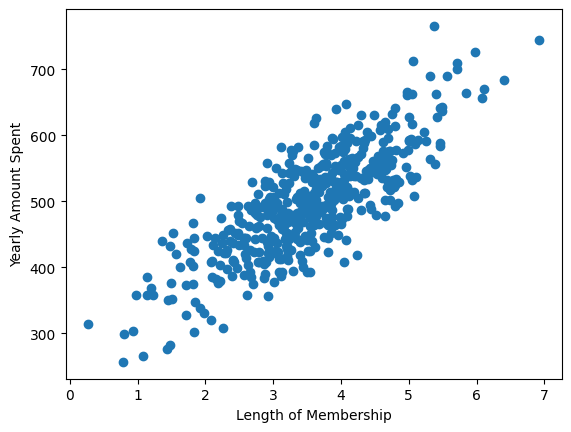

In [11]:
plt.scatter(customers['Length of Membership'], customers['Yearly Amount Spent'])
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")

Text(0, 0.5, 'Yearly Amount Spent')

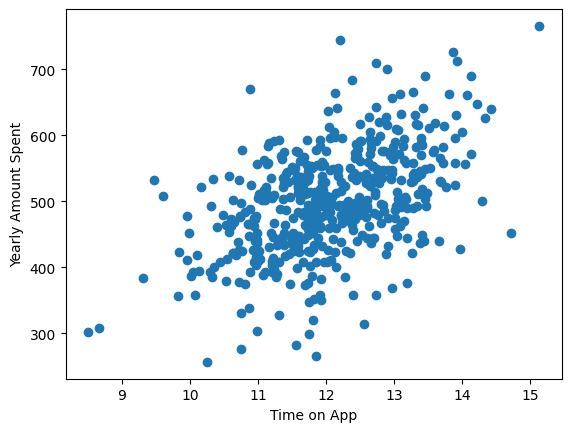

In [12]:
plt.scatter(customers['Time on App'], customers['Yearly Amount Spent'])
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")

## Checking for Collinearity ##

In [13]:
# Measuring if therre is stong relationship between the two independetn variables- time on app and length of membership

customers[['Time on App','Length of Membership']].corr()

,Time on App,Length of Membership
Time on App,1.000000,0.029143
Length of Membership,0.029143,1.000000


## Split the DataFrame into train and test data

In [14]:
train, test = train_test_split(
    customers,
    random_state = 13 # this ensures that we get the same answer each time
)

In [15]:
train.shape

(375, 5)

In [16]:
test.shape

(125, 5)

## Train the model

In [17]:
# Identify dependent and independent variables

dependent_var = train['Yearly Amount Spent']
independent_var = train[['Time on App', 'Length of Membership']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()


In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.879
Method:                  Least Squares   F-statistic:                     1363.
Date:                 Fri, 16 Jun 2023   Prob (F-statistic):          5.70e-172
Time:                         10:05:49   Log-Likelihood:                -1778.4
No. Observations:                  375   AIC:                             3563.
Df Residuals:                      372   BIC:                             3575.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -179.0165     17.889    -10.007      0.000    -214.193    -143.840
Time on App             37.6226      1.446     26.018      0.000      34.779      40.466
Length of Membership    63.6371      1.465     43.435      0.000      60.756      66.518
==============================================================================
Omnibus:                        3.637   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                2.961
Skew:                          -0.107   Prob(JB):                        0.228
Kurtosis:                       2.621   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Equation of the LBF

As we have two independent variables, we need to use both coefficients to construct our equation of the LBF:

$$\begin{aligned}
\text{Predicted Yearly Spend } = &+ 37.6 \times \text{[Time on App]}\\
&+ 63.6 \times \text{[Length of Membership]}\\
&-179.1 \\
\end{aligned}$$

So a customer who spends an extra minute on the app will spend on average £37.6 extra. Similarly, a customer who has been a member for an extra year will spend on average £63.6 extra.

### Is the model 'a good fit'? ###
To understand if a model can be used to make a prediction we need to look at additional elements of the OLS Regression results: <br>

- **p-value**\
A p-value < 0.05 suggests that our data is statistically significant and that the values for our variable cannot be explained by mere coincidence. It helps us to identify which independent variables have a significant effect on the dependent variable. 


- **R-squared**\
R-squared tells us how closely the data fits the model between 0 (terrible fit) and 1 (perfect fit). In our case, 87.9\% is high.\
In good real world examples - you can expect to achieve closer to 30\%. \
\
30\% is usually sufficient because we are not trying to describe exactly the dependent variable (since we don’t have all the data), we just want to give an estimate as to what might happen under small changes. Despite not describing everything, the model still has practical use!

- **Adjusted R-squared**\
Adjusted R-squared is similar to the R-squared but is for models with more than 1 independent variable. 

- **F-Statistic**\
F-statistic is a test to compare two models. In this case, it is comparing our regression model to the base model (taking the mean).\
A high F value (> 1) means that the new model is better. A low F value (< 1) means that the old model is better.

- **Prob F-Statistic**\
Prob (F-Statistic) tells us how statistically significant this value is. The lower the probability, the more significant the difference between models. In our case, our regression model is MUCH better than the base model in a statistically significant way.

 
## Predict data for the test set and compare ##

In [19]:
predicted = model.predict(
    sm.add_constant(test[['Time on App','Length of Membership']])
)

In [20]:
predicted

0      556.927311
334    351.505092
33     493.471148
264    598.383563
428    587.088738
          ...    
125    582.673469
161    349.122145
61     505.788414
97     593.826403
13     557.907083
Length: 125, dtype: float64

## Is the model also 'a good fit' for our test data? ##
We can check this by looking at the R squared score for our prediction.

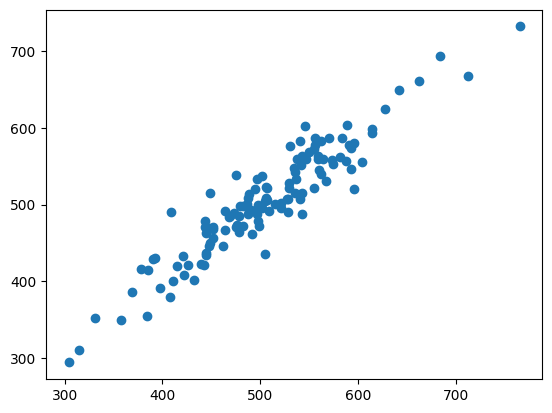

In [21]:
plt.scatter(test['Yearly Amount Spent'], predicted)

In [22]:
# Measure the test R squared

metrics.r2_score(test['Yearly Amount Spent'],predicted)

0.8839783204142245

# Rebuilding the model for the whole data set ##

In [23]:
dependent_var = customers['Yearly Amount Spent']
independent_var = customers[['Time on App', 'Length of Membership']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.881
Model:                             OLS   Adj. R-squared:                  0.881
Method:                  Least Squares   F-statistic:                     1842.
Date:                 Fri, 16 Jun 2023   Prob (F-statistic):          1.38e-230
Time:                         10:05:49   Log-Likelihood:                -2363.2
No. Observations:                  500   AIC:                             4732.
Df Residuals:                      497   BIC:                             4745.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -181.5310     15.422    -11.771      0.000    -211.831    -151.231
Time on App             37.9857      1.234     30.777      0.000      35.561      40.411
Length of Membership    63.1173      1.228     51.400      0.000      60.705      65.530
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.365
Skew:                          -0.106   Prob(JB):                        0.505
Kurtosis:                       2.857   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Make a prediction

In [25]:
# predict the Yearly Amount spent based on a given Time on App and Length of Membership
example_time = 30
example_length = 3

round(model.predict([1, example_time,example_length])[0],2)

1147.39

# Model with all Variables - Exercise w/ Advertising_budget

In [26]:
budgets = pd.read_csv("../datasets/MLR_advertising_budget.csv")
budgets.head()

,TV Ad Budget,Radio Ad Budget,Newspaper Ad Budget,Advertising Budget total,Sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


In [27]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TV Ad Budget              200 non-null    float64
 1   Radio Ad Budget           200 non-null    float64
 2   Newspaper Ad Budget       200 non-null    float64
 3   Advertising Budget total  200 non-null    float64
 4   Sales                     200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [28]:
budgets.describe()

,TV Ad Budget,Radio Ad Budget,Newspaper Ad Budget,Advertising Budget total,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,200.860500,14.022500
std,85.854236,14.846809,21.778621,92.985181,5.217457
min,0.700000,0.000000,0.300000,11.700000,1.600000
25%,74.375000,9.975000,12.750000,123.550000,10.375000
50%,149.750000,22.900000,25.750000,207.350000,12.900000
75%,218.825000,36.525000,45.100000,281.125000,17.400000
max,296.400000,49.600000,114.000000,433.600000,27.000000


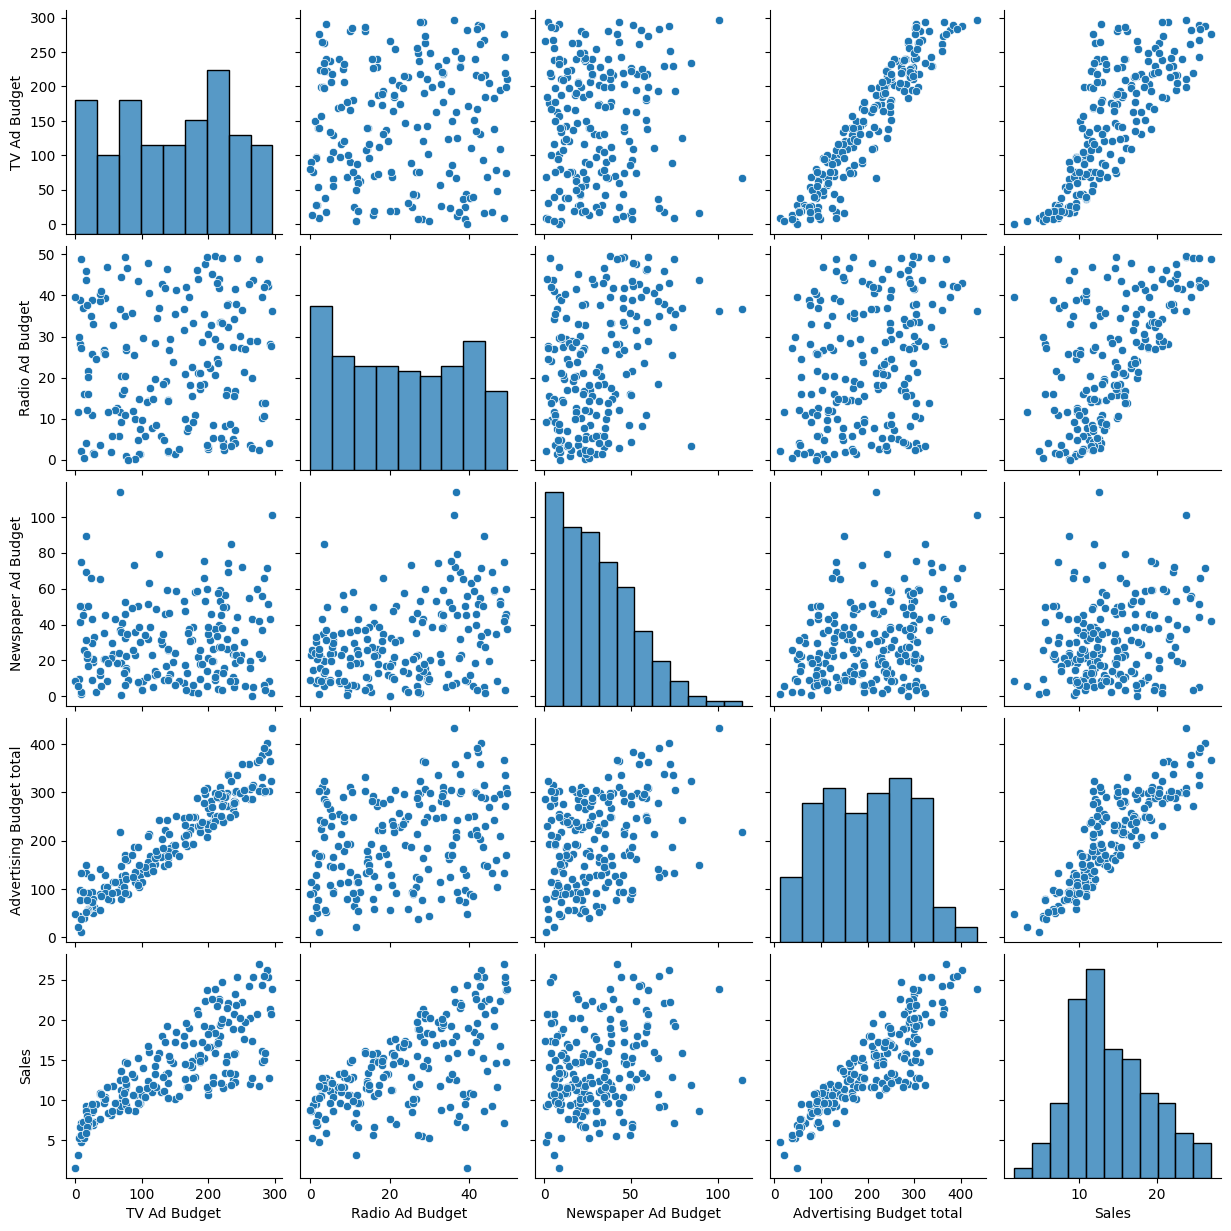

In [29]:
sns.pairplot(budgets)

In [30]:
corr_matrix = budgets.corr().abs()
filtered_matrix = corr_matrix[corr_matrix > 0.4]
filtered_matrix

,TV Ad Budget,Radio Ad Budget,Newspaper Ad Budget,Advertising Budget total,Sales
TV Ad Budget,1.000000,NaN,NaN,0.945330,0.782224
Radio Ad Budget,NaN,1.000000,NaN,NaN,0.576223
Newspaper Ad Budget,NaN,NaN,1.0,NaN,NaN
Advertising Budget total,0.945330,NaN,NaN,1.000000,0.867712
Sales,0.782224,0.576223,NaN,0.867712,1.000000


Text(0, 0.5, 'Sales')

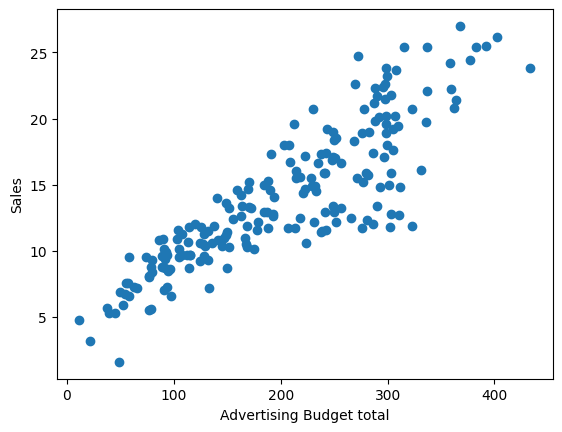

In [31]:
plt.scatter(budgets['Advertising Budget total'], budgets['Sales'])
plt.xlabel("Advertising Budget total")
plt.ylabel("Sales")

There is very high correlation between Advertising budget total and TV Ad Budget. I will ignore this for now to see the effect.

In [32]:
train, test = train_test_split(
    budgets,
    random_state = 13 # this ensures that we get the same answer each time
)

dependent_var = train['Sales']
independent_var = train[['TV Ad Budget', 'Radio Ad Budget', 'Newspaper Ad Budget', 'Advertising Budget total']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     361.1
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           2.56e-67
Time:                        10:05:51   Log-Likelihood:                -295.90
No. Observations:                 150   AIC:                             599.8
Df Residuals:                     146   BIC:                             611.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.9395      0.394      7.464      0.000       2.161       3.718
TV Ad Budget                -0.0109      0.003     -3.808      0.000      -0.017      -0.005
Radio Ad Budget              0.1270      0.009     14.646      0.000       0.110       0.144
Newspaper Ad Budget         -0.0589      0.007     -8.368      0.000      -0.073      -0.045
Advertising Budget total     0.0571      0.003     21.485      0.000       0.052       0.062
==============================================================================
Omnibus:                       47.653   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.309
Skew:                          -1.334   Prob(JB):                     4.10e-25
Kurtosis:                       6.293   Cond. No.                     1.49e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.03e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Warning there is multicollinearity.

The LBF is: 

y = -0.0109a + 0.1270b - 0.0589c + 0.0571d + 2.9395

where 

      a is TV Ad Budget

      b is Radio Ad Budget

      c is Newspaper Ad Budget
      
      d is Adveritising Budget total

R-squared is:  0.9329679186406996


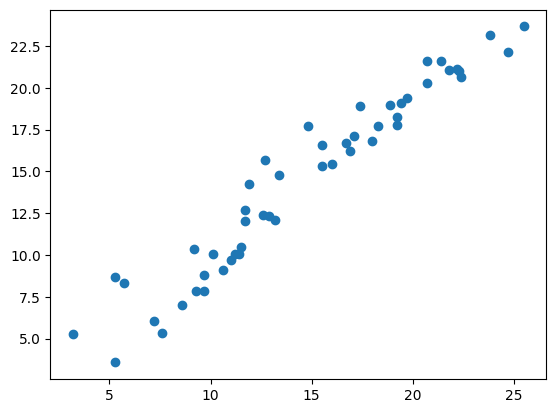

In [33]:
predicted = model.predict(
    sm.add_constant(test[['TV Ad Budget', 'Radio Ad Budget', 'Newspaper Ad Budget', 'Advertising Budget total']]))
plt.scatter(test['Sales'], predicted)
print('R-squared is: ',metrics.r2_score(test['Sales'],predicted))

I will now try again removing the total budget and see how this differs.

In [34]:
dependent_var = train['Sales']
independent_var = train[['TV Ad Budget', 'Radio Ad Budget', 'Newspaper Ad Budget']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     361.1
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           2.56e-67
Time:                        10:05:51   Log-Likelihood:                -295.90
No. Observations:                 150   AIC:                             599.8
Df Residuals:                     146   BIC:                             611.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9395      0.394      7.464      0.000       2.161       3.718
TV Ad Budget            0.0462      0.002     27.242      0.000       0.043       0.050
Radio Ad Budget         0.1841      0.010     17.718      0.000       0.164       0.205
Newspaper Ad Budget    -0.0018      0.008     -0.237      0.813      -0.017       0.013
==============================================================================
Omnibus:                       47.653   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.309
Skew:                          -1.334   Prob(JB):                     4.10e-25
Kurtosis:                       6.293   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The LBF is: 

y = 0.0462a + 0.1841b - 0.0018c + 2.9395

where 

      a is TV Ad Budget

      b is Radio Ad Budget

      c is Newspaper Ad Budget

'Newspaper Ad Budget' has a high p-value, indicating that the variable is not statistically significant and does not have a significant effect on the outcome variable. It should therefore be removed from the model as well.

In [35]:
dependent_var = train['Sales']
independent_var = train[['TV Ad Budget', 'Radio Ad Budget']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     545.2
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           9.98e-69
Time:                        10:05:51   Log-Likelihood:                -295.93
No. Observations:                 150   AIC:                             597.9
Df Residuals:                     147   BIC:                             606.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9042      0.363      7.990      0.000       2.186       3.622
TV Ad Budget        0.0462      0.002     27.373      0.000       0.043       0.050
Radio Ad Budget     0.1832      0.010     18.945      0.000       0.164       0.202
==============================================================================
Omnibus:                       47.081   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.623
Skew:                          -1.329   Prob(JB):                     2.59e-24
Kurtosis:                       6.212   Cond. No.                         423.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The LBF is: 

y = 0.0462a + 0.1832b  + 2.9042

where 

      a is TV Ad Budget

      b is Radio Ad Budget

R-squared is:  0.9330669780312204


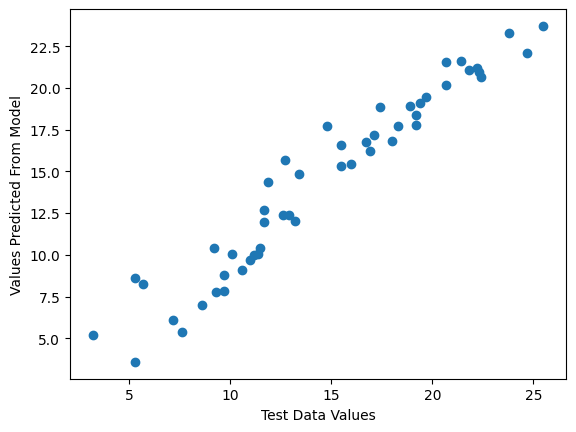

In [36]:
predicted = model.predict(
    sm.add_constant(test[['TV Ad Budget', 'Radio Ad Budget']]))
plt.scatter(test['Sales'], predicted)
plt.xlabel('Test Data Values')
plt.ylabel('Values Predicted From Model')
print('R-squared is: ',metrics.r2_score(test['Sales'],predicted))

The R-squared value is slightly higher than before (0.9329679186406996) indicating a better match between the model predictions and test data.

# Challenge s/ Car Price

In [37]:
cars = pd.read_csv("../datasets/MLR_car_price.csv")
cars.head(5)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


For the sake of this analysis I will only be looking at numerical factors so I will amend the data from to only include numerical variables, ordinal data will also be excluded.

In [38]:
cars = cars[['symboling', 'enginesize','wheelbase', 'carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
cars.head()

#file.select_dtyoes(include=['int64', 'float64']) instead above

,symboling,enginesize,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,130,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,130,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,152,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,109,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,136,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450.0


In [39]:
cars.describe()

,symboling,enginesize,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.907317,98.756585,174.049268,65.907805,53.724878,2555.565854,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,41.642693,6.021776,12.337289,2.145204,2.443522,520.680204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,61.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,97.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,120.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,141.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,326.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [40]:
cars.shape

(205, 15)

In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   enginesize        205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.2 KB


In [42]:
train, test = train_test_split(
    cars,
    random_state = 13 # this ensures that we get the same answer each time
)

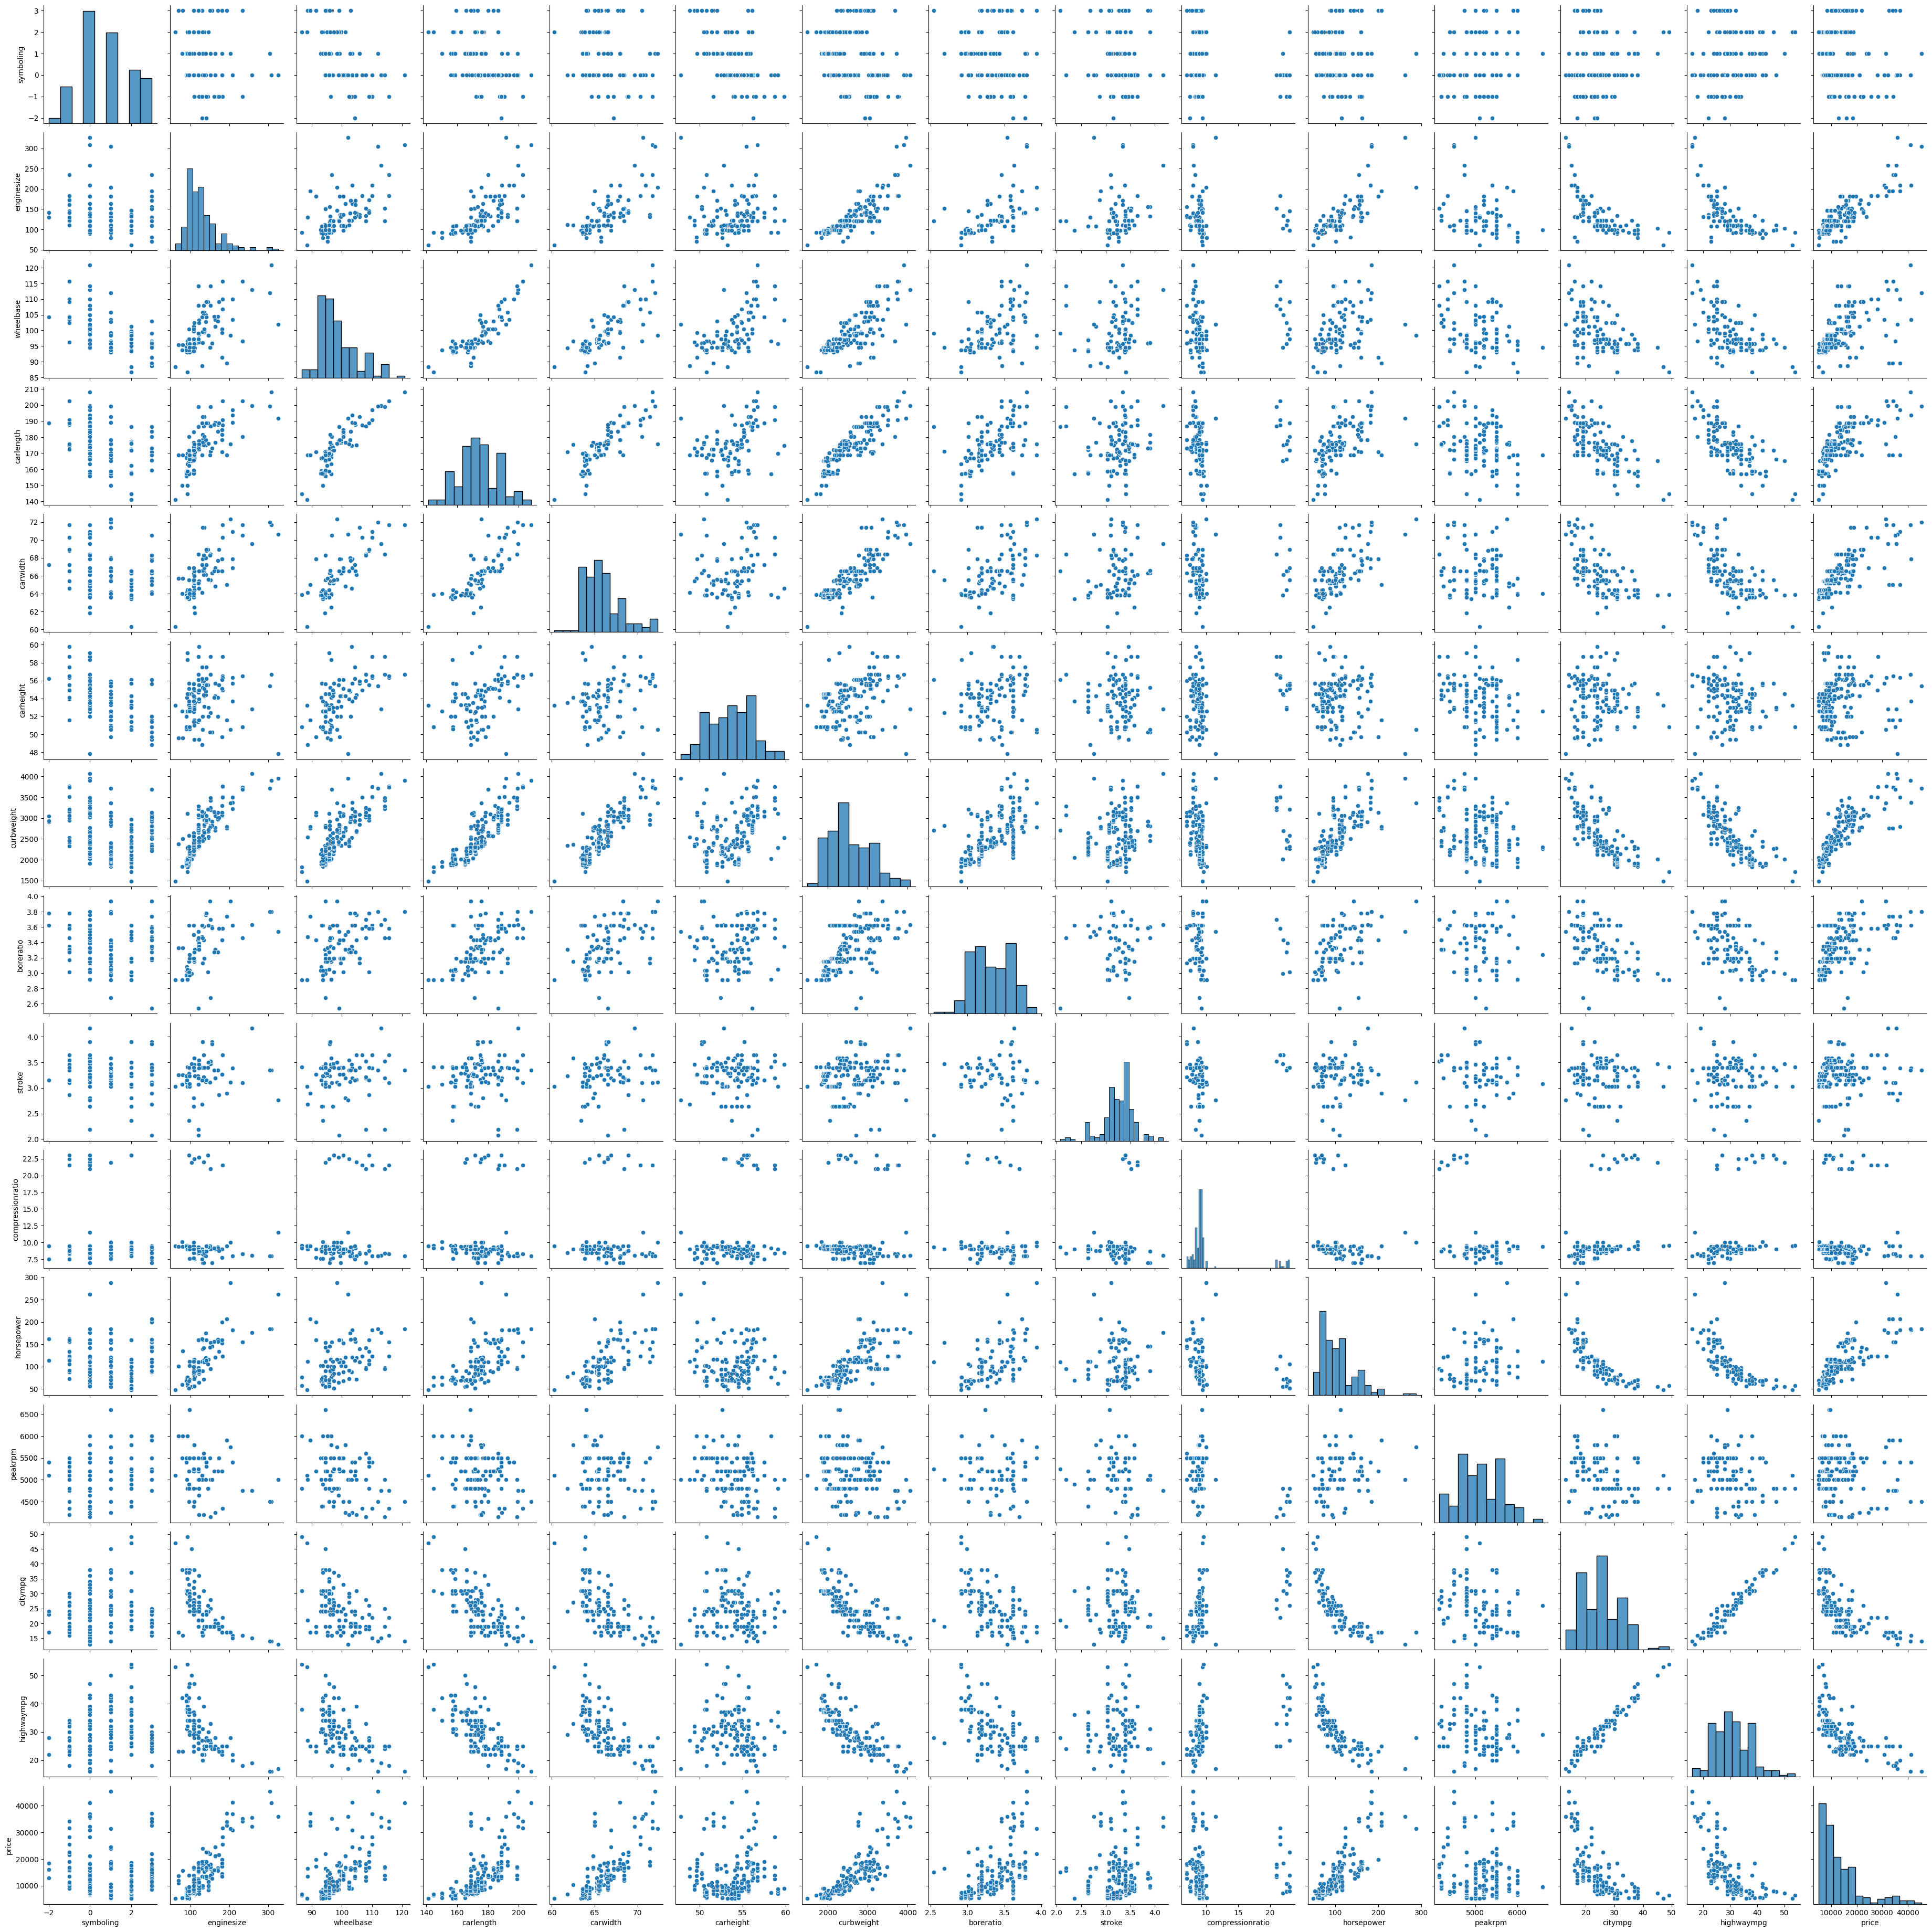

In [43]:
sns.pairplot(cars)

This is a lot of data to look through, looking at the correlation matrix will be easier.

In [44]:
corr_matrix = cars.corr().abs()
filtered_matrix = corr_matrix[corr_matrix > 0.4]
filtered_matrix

,symboling,enginesize,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,NaN,0.531954,NaN,NaN,0.541038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginesize,NaN,1.000000,0.569329,0.683360,0.735433,NaN,0.850594,0.583774,NaN,NaN,0.809769,NaN,0.653658,0.677470,0.874145
wheelbase,0.531954,0.569329,1.000000,0.874587,0.795144,0.589435,0.776386,0.488750,NaN,NaN,NaN,NaN,0.470414,0.544082,0.577816
carlength,NaN,0.683360,0.874587,1.000000,0.841118,0.491029,0.877728,0.606454,NaN,NaN,0.552623,NaN,0.670909,0.704662,0.682920
carwidth,NaN,0.735433,0.795144,0.841118,1.000000,NaN,0.867032,0.559150,NaN,NaN,0.640732,NaN,0.642704,0.677218,0.759325
carheight,0.541038,NaN,0.589435,0.491029,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curbweight,NaN,0.850594,0.776386,0.877728,0.867032,NaN,1.000000,0.648480,NaN,NaN,0.750739,NaN,0.757414,0.797465,0.835305
boreratio,NaN,0.583774,0.488750,0.606454,0.559150,NaN,0.648480,1.000000,NaN,NaN,0.573677,NaN,0.584532,0.587012,0.553173
stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
compressionratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.435741,NaN,NaN,NaN


The variables to look at that affect price are shown below. 
This is because they have a correlation coefficient with price above 0.4.

In [45]:
variables_corr_to_price = filtered_matrix.index[filtered_matrix['price'] > 0.4].tolist()[:-1]
variables_corr_to_price

['enginesize',
 'wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg']

The multicollinearities are shown below.

In [46]:
corr_dict = {}
uncorrelated_vars = corr_matrix.index[corr_matrix['price'] <= 0.4 ].tolist()

for column in variables_corr_to_price:
    corr_variables = filtered_matrix.index[filtered_matrix[column] > 0.4].tolist()
    columns_to_remove = [column, 'price'] + uncorrelated_vars
    for var in corr_variables:
        if var in columns_to_remove:
            corr_variables.remove(var)
    corr_dict[column] = corr_variables

corr_dict

{'enginesize': ['wheelbase',
  'carlength',
  'carwidth',
  'curbweight',
  'boreratio',
  'horsepower',
  'citympg',
  'highwaympg'],
 'wheelbase': ['enginesize',
  'carlength',
  'carwidth',
  'curbweight',
  'boreratio',
  'citympg',
  'highwaympg'],
 'carlength': ['enginesize',
  'wheelbase',
  'carwidth',
  'curbweight',
  'boreratio',
  'horsepower',
  'citympg',
  'highwaympg'],
 'carwidth': ['enginesize',
  'wheelbase',
  'carlength',
  'curbweight',
  'boreratio',
  'horsepower',
  'citympg',
  'highwaympg'],
 'curbweight': ['enginesize',
  'wheelbase',
  'carlength',
  'carwidth',
  'boreratio',
  'horsepower',
  'citympg',
  'highwaympg'],
 'boreratio': ['enginesize',
  'wheelbase',
  'carlength',
  'carwidth',
  'curbweight',
  'horsepower',
  'citympg',
  'highwaympg'],
 'horsepower': ['enginesize',
  'carlength',
  'carwidth',
  'curbweight',
  'boreratio',
  'citympg',
  'highwaympg'],
 'citympg': ['enginesize',
  'wheelbase',
  'carlength',
  'carwidth',
  'curbweight',

These are a lot to work with, it will be hard to select which variable to go ahead with. I will continue into the model and see which variables have the highest p-values.

Text(0, 0.5, 'wheelbase')

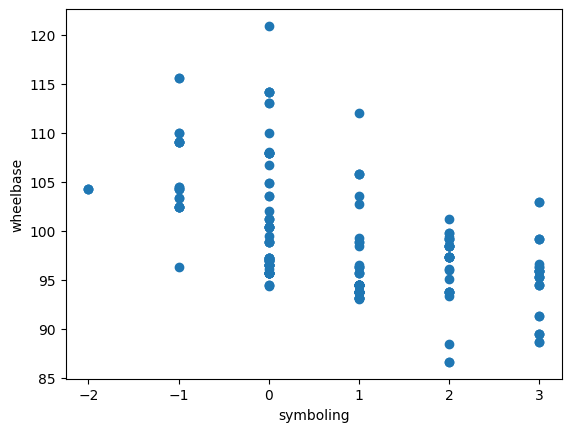

In [47]:
plt.scatter(cars['symboling'], cars['wheelbase'])
plt.xlabel("symboling")
plt.ylabel("wheelbase")

Model with all variables:

In [52]:
dependent_var = train['price']
independent_var = train[['symboling', 'wheelbase', 'enginesize','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     67.57
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           1.55e-54
Time:                        10:07:15   Log-Likelihood:                -1435.4
No. Observations:                 153   AIC:                             2901.
Df Residuals:                     138   BIC:                             2946.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.539e+04   1.76e+04     -3.145      0.002   -9.02e+04   -2.06e+04
symboling          327.7910    264.066      1.241      0.217    -194.348     849.930
wheelbase          107.4445    117.825      0.912      0.363    -125.532     340.421
enginesize         105.0346     14.499      7.244      0.000      76.366     133.704
carlength          -74.5206     62.483     -1.193      0.235    -198.069      49.028
carwidth           651.6696    281.496      2.315      0.022      95.067    1208.272
carheight          136.0930    145.651      0.934      0.352    -151.903     424.089
curbweight           3.7457      1.865      2.009      0.047       0.059       7.433
boreratio        -1849.5366   1396.187     -1.325      0.187   -4610.222     911.149
stroke           -3199.9038    951.801     -3.362      0.001   -5081.903   -1317.905
compressionratio   219.1297     96.675      2.267      0.025      27.973     410.286
horsepower          16.1221     16.756      0.962      0.338     -17.009      49.253
peakrpm              2.3456      0.719      3.264      0.001       0.925       3.766
citympg           -157.5485    211.026     -0.747      0.457    -574.810     259.714
highwaympg          70.6384    176.304      0.401      0.689    -277.969     419.246
==============================================================================
Omnibus:                       42.638   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.271
Skew:                           0.936   Prob(JB):                     8.72e-39
Kurtosis:                       7.898   Cond. No.                     4.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are lots of high p-values. Next I use just the variables identifies earlier that have correlation coefficients above 0.4 with price. 

In [49]:
dependent_var = train['price']
independent_var = train[['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     80.42
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           2.80e-49
Time:                        10:06:11   Log-Likelihood:                -1463.1
No. Observations:                 153   AIC:                             2944.
Df Residuals:                     144   BIC:                             2971.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.548e+04   1.63e+04     -4.014      0.000   -9.77e+04   -3.32e+04
wheelbase     35.5879    123.013      0.289      0.773    -207.556     278.732
carlength    -84.3839     70.637     -1.195      0.234    -224.004      55.236
carwidth     941.3476    310.931      3.028      0.003     326.770    1555.926
curbweight     8.6115      1.791      4.809      0.000       5.072      12.151
boreratio  -1144.7021   1463.551     -0.782      0.435   -4037.520    1748.116
horsepower    71.1712     15.911      4.473      0.000      39.721     102.621
citympg      301.8937    222.772      1.355      0.177    -138.432     742.219
highwaympg  -175.3231    196.915     -0.890      0.375    -564.541     213.895
==============================================================================
Omnibus:                       62.212   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.193
Skew:                           1.522   Prob(JB):                     7.64e-50
Kurtosis:                       8.121   Cond. No.                     1.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now I am only using variables with p-value below 5%

In [50]:
dependent_var = train['price']
independent_var = train[[
 'carwidth',
 'curbweight',
 'horsepower']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     207.5
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           5.53e-53
Time:                        10:06:11   Log-Likelihood:                -1467.2
No. Observations:                 153   AIC:                             2942.
Df Residuals:                     149   BIC:                             2955.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.533e+04   1.56e+04     -4.192      0.000   -9.61e+04   -3.45e+04
carwidth     835.1054    272.065      3.070      0.003     297.501    1372.710
curbweight     6.6730      1.300      5.133      0.000       4.104       9.242
horsepower    61.7038     11.898      5.186      0.000      38.194      85.214
==============================================================================
Omnibus:                       55.637   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.488
Skew:                           1.420   Prob(JB):                     2.59e-37
Kurtosis:                       7.285   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the three remain variables, there is high correlation between carwidth and curbweight, horsepower (0.867032, 0.640732).  There is also high correlation between horsepower and curbweight (0.750739).

Since all three are correlated it is best to used single variable linear regression with the most corralated variable to price. This is curbweight with 0.835305.

In [53]:
dependent_var = train['price']
independent_var = train['enginesize']
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     529.2
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           3.26e-51
Time:                        10:08:58   Log-Likelihood:                -1477.9
No. Observations:                 153   AIC:                             2960.
Df Residuals:                     151   BIC:                             2966.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7389.6854    935.789     -7.897      0.000   -9238.617   -5540.754
enginesize   162.6099      7.068     23.005      0.000     148.644     176.576
==============================================================================
Omnibus:                       23.629   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.312
Skew:                           0.853   Prob(JB):                     5.84e-08
Kurtosis:                       4.522   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""